In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
school_topics = pd.read_csv('school_final.csv')
prison_topics = pd.read_csv('prison_topics_use2.csv')
prison_full = pd.read_csv('prison_full.csv')

In [5]:
school_topics.head()

,Title,Author,publisher,description,published_date,categories,Type of Ban,State,District,Date of Challenge/Removal,Origin of Challenge,State_Count,Topic
0,Ace of Spades,"Àbíké-Íyímídé, Faridah",Feiwel & Friends,"Gossip Girl meets Get Out in Ace of Spades, a ...",2021-06-01,Young Adult Fiction,Banned in Libraries and Classrooms,Florida,Indian River County School District,November 2021,Administrator,923,love_school_life_friends
1,Clap When You Land,"Acevedo, Elizabeth",HarperCollins,In a novel-in-verse that brims with grief and ...,2020-05-05,Young Adult Fiction,Banned in Classrooms,Pennsylvania,Central York School District,August 2021,Administrator,485,mother_life_father_manu
2,The Poet X,"Acevedo, Elizabeth",HarperCollins,A National Book Award Longlist title! Fans of ...,2019-03-19,Young Adult Fiction,Banned in Libraries,Florida,Indian River County School District,November 2021,Administrator,923,book_black_color_blue
3,The Poet X,"Acevedo, Elizabeth",HarperCollins,A National Book Award Longlist title! Fans of ...,2019-03-19,Young Adult Fiction,Banned in Libraries and Classrooms,New York,Marlboro Central School District,February 2022,Administrator,15,book_black_color_blue
4,The Poet X,"Acevedo, Elizabeth",HarperCollins,A National Book Award Longlist title! Fans of ...,2019-03-19,Young Adult Fiction,Banned Pending Investigation,Texas,Fredericksburg Independent School District,March 2022,Administrator,1239,book_black_color_blue


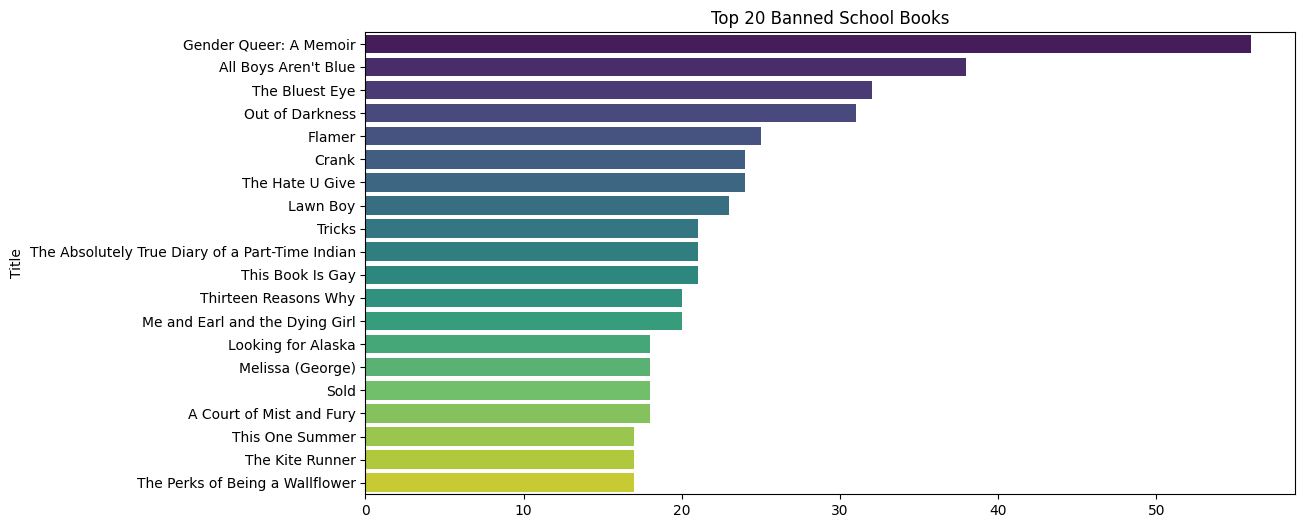

In [6]:
df_sorted = school_topics['Title'].value_counts().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=df_sorted.values, y=df_sorted.index, palette='viridis')

plt.title('Top 20 Banned School Books')  # Title of the plot

plt.show()

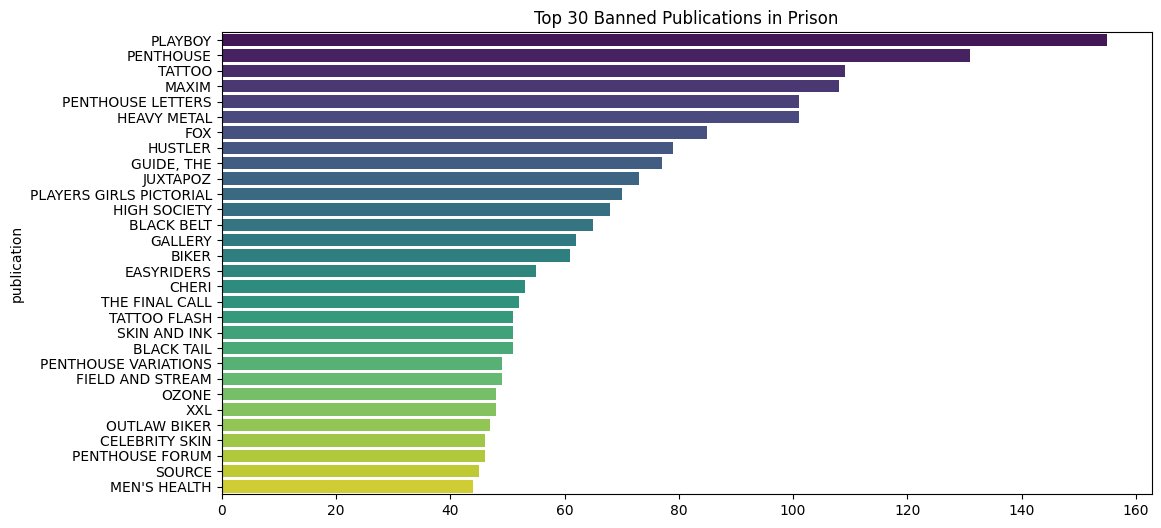

In [4]:
prison_sorted = prison_topics['publication'].value_counts().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=prison_sorted.values, y=prison_sorted.index, palette='viridis')

plt.title('Top 30 Banned Publications in Prison')  # Title of the plot

plt.show()

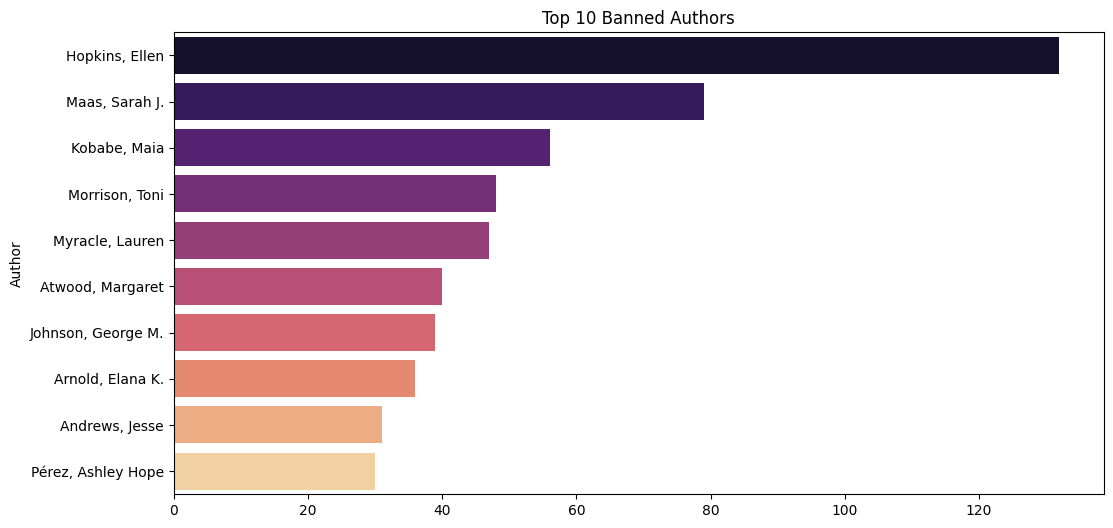

In [9]:
author_sorted = school_topics['Author'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=author_sorted.values, y=author_sorted.index, palette='magma')

plt.title('Top 10 Banned Authors')  

plt.show()

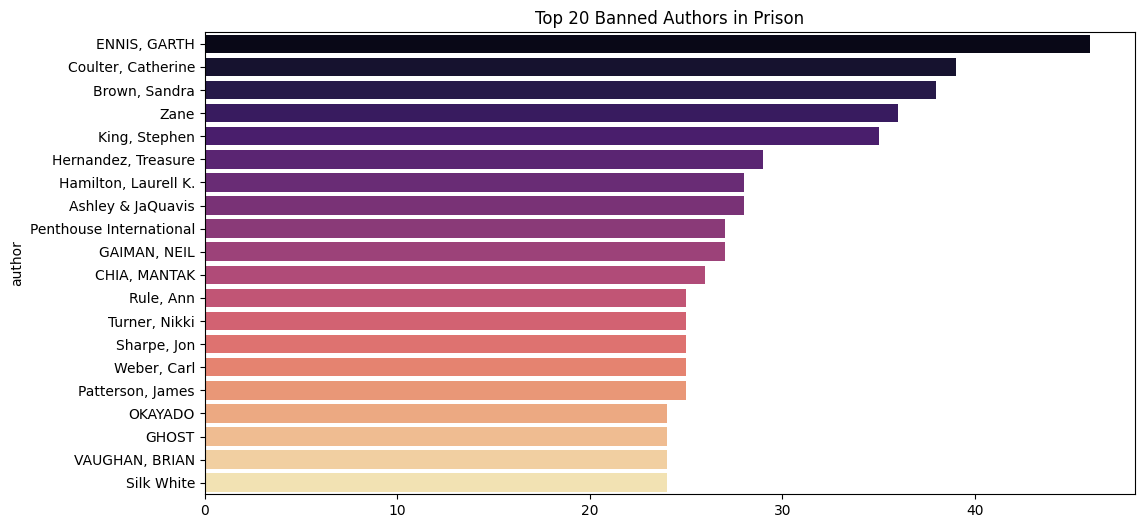

In [7]:
filtered_authors = prison_topics[prison_topics['author'] != 'NONE']

# Calculate the value counts and sort the authors in descending order
prison_authors = filtered_authors['author'].value_counts().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6)) 
sns.barplot(x=prison_authors.values, y=prison_authors.index, palette='magma')

plt.title('Top 20 Banned Authors in Prison')  

plt.show()

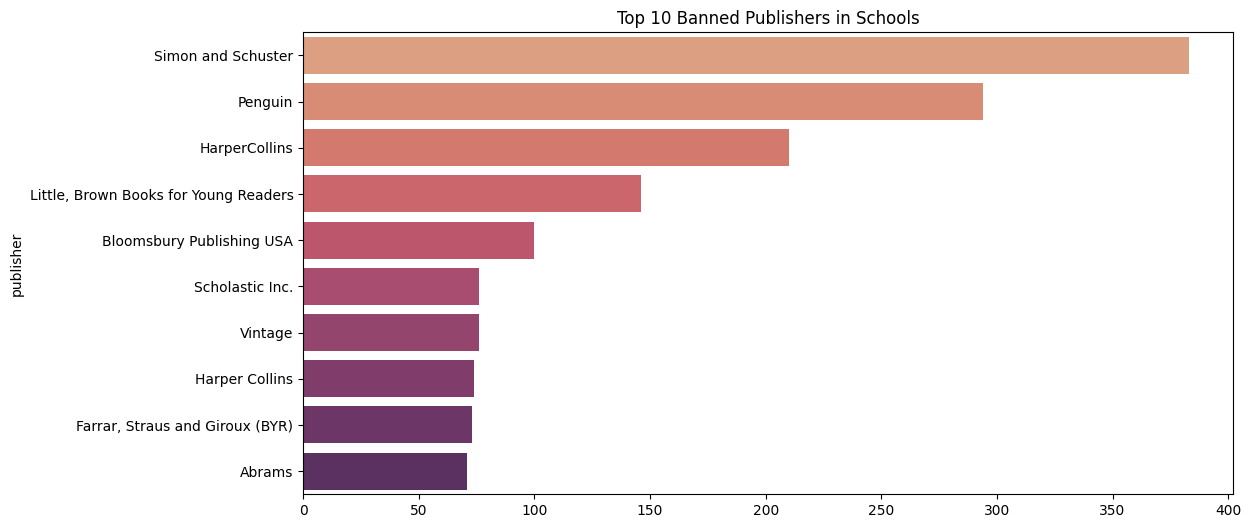

In [8]:
publisher_sorted = school_topics['publisher'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6)) 
# reverses the palette
#coolwarm_reversed = sns.color_palette("coolwarm").as_hex()[::-1]
sns.barplot(x=publisher_sorted.values, y=publisher_sorted.index, palette='flare')

plt.title('Top 10 Banned Publishers in Schools') 

plt.show()

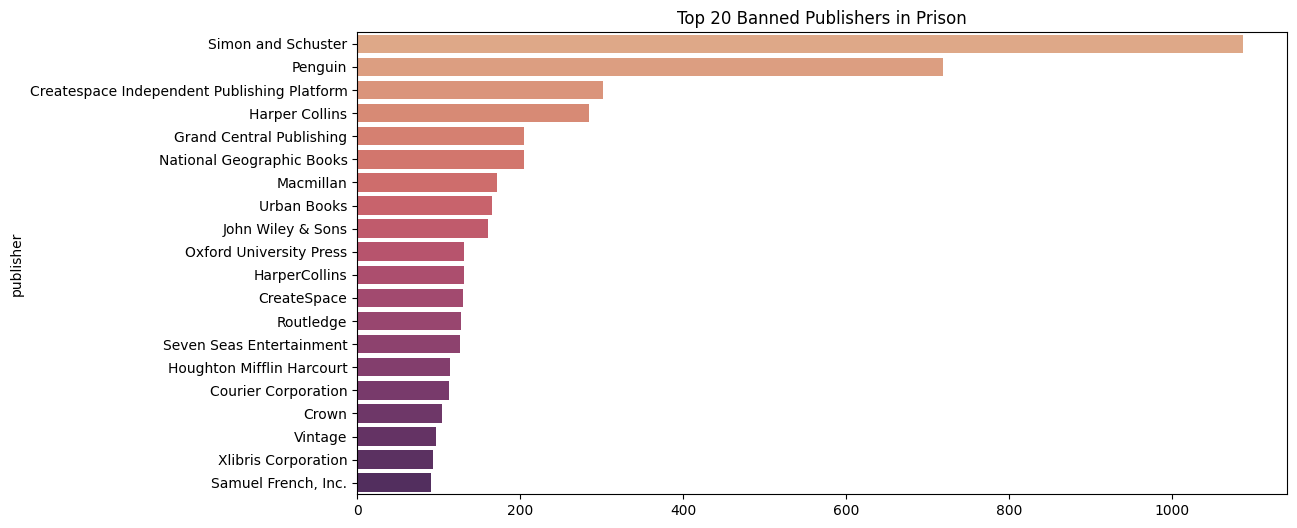

In [15]:
prison_pubs = prison_topics['publisher'].value_counts().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6)) 
# reverses the palette
#coolwarm_reversed = sns.color_palette("coolwarm").as_hex()[::-1]
sns.barplot(x=prison_pubs.values, y=prison_pubs.index, palette='flare')

plt.title('Top 20 Banned Publishers in Prison') 

plt.show()

In [9]:
# find books that are banned in both schools and prisons
# convert 'title' and 'publication' columns to lowercase
school_topics['Title'] = school_topics['Title'].str.lower()
prison_topics['publication'] = prison_topics['publication'].str.lower()

# find common titles
common_titles = set(school_topics['Title']) & set(prison_topics['publication'])

# filter school_books dataframe to only include common titles
result_school = school_topics[school_topics['Title'].isin(common_titles)]

# drop duplicates from prison_books dataframe
prison_books = prison_topics.drop_duplicates(subset=['publication'])

# filter prison_books dataframe to only include common titles
result_prison = prison_books[prison_books['publication'].isin(common_titles)]

# merge the two dataframes on 'Title' and 'publication' columns
merged_df = pd.merge(result_school[['Author', 'Title', 'District', 'Date of Challenge/Removal', 'State', 'Topic']],
                     result_prison[['publication', 'date', 'reason', 'state_arc']],
                     how='left',
                     left_on='Title',
                     right_on='publication')

# drop the 'publication' column
merged_df = merged_df.drop('publication', axis=1)
merged_df

,Author,Title,District,Date of Challenge/Removal,State,Topic,date,reason,state_arc
0,"Aciman, André",call me by your name,Spotsylvania County Public Schools,November 2021,Virginia,grayson_novel_funny_day,NaN,NaN,OR
1,"Adeyemi, Tomi",children of blood and bone,Katy Independent School District,January 2022,Texas,fantasy_series_world_magic,2021-09-01,Spencer - Thumbed through the book and did not...,MO
2,"Albertalli, Becky",simon vs. the homo sapiens agenda,Collierville Schools,February 2022,Tennessee,school_boy_gay_love,2019-06-01,Good LGBTQ fiction book. A little more teen-fo...,MO
3,"Albertalli, Becky",simon vs. the homo sapiens agenda,Granbury Independent School District,January 2022,Texas,school_boy_gay_love,2019-06-01,Good LGBTQ fiction book. A little more teen-fo...,MO
4,"Albertalli, Becky",simon vs. the homo sapiens agenda,North East Independent School District,December 2021,Texas,school_boy_gay_love,2019-06-01,Good LGBTQ fiction book. A little more teen-fo...,MO
...,...,...,...,...,...,...,...,...,...
603,"McCormick, Patricia",sold,Washington County School District,November 2022,Utah,sex_puberty_body_sexual,2014-09-30,"PGS 102, 103, 120 & 121 SEX W/MINOR",TX
604,"Morrison, Toni",the bluest eye,Washington County School District,November 2022,Utah,book_black_color_blue,2020-12-01,CO censorship log: contains inappropriate sexu...,MO
605,"Chbosky, Stephen",the perks of being a wallflower,Washington County School District,November 2022,Utah,school_boy_gay_love,2017-11-01,There is a sexual assault scene. It's about a ...,MO
606,"Hopkins, Ellen",triangles,Washington County School District,November 2022,Utah,sex_puberty_body_sexual,2015-03-01,a little too much sex for me,MO


In [15]:
merged_df['Title'].nunique()

167

In [11]:
unique_titles = merged_df['Title'].unique()

for title in unique_titles:
    print(title)

call me by your name
children of blood and bone
simon vs. the homo sapiens agenda
the new jim crow: mass incarceration in the age of colorblindness
i know why the caged bird sings
a girl on the shore
blindspot: hidden biases of good people
six of crows
peter pan
heart of thorns
into the real
awakened
betrayed
burned
hidden
marked
tempted
untamed
the perks of being a wallflower
city of heavenly fire
clockwork princess
the lost book of the white
the red scrolls of magic
between the world and me
gender identity: beyond pronouns and bathrooms
class act
after
the circle
gone girl
dime
outlander
full disclosure
not so pure and simple
cross my heart
looking for alaska
hooked
homegoing
dead until dark
little legends: exceptional men in black history
geography club
rethinking normal: a memoir in transition
crank
glass
identical
impulse
people kill people
smoke
the you i've never known
traffick
triangles
the kite runner
brave new world
speak no evil
fifty shades of grey
day of the dead
fire song